## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/updated/"

## 2. Preliminar Tests

In [50]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,FCF,PricePerShare,ROE,Prediction
1985-03,0.963,13.113760,15.517727,12.891271
1985-06,0.963,12.891271,15.517727,13.015066
1985-09,0.963,13.015066,15.517727,16.473642
1985-12,0.963,16.473642,15.517727,16.164600
1986-03,0.963,16.164600,15.517727,15.745636
1986-06,0.963,15.745636,15.517727,14.578185
1986-09,0.963,14.578185,15.517727,13.121224
1986-12,0.963,13.121224,15.517727,16.549911
1987-03,0.963,16.549911,15.517727,18.033113
1987-06,0.963,18.033113,15.517727,16.844805


In [51]:
data_traintest = data.drop(data.index[data.index.get_loc('2020-09'):], axis=0)
data_predict = data.drop(data.index[:data.index.get_loc('2020-09')], axis=0)

In [52]:
data_traintest

,FCF,PricePerShare,ROE,Prediction
1985-03,0.963,13.113760,15.517727,12.891271
1985-06,0.963,12.891271,15.517727,13.015066
1985-09,0.963,13.015066,15.517727,16.473642
1985-12,0.963,16.473642,15.517727,16.164600
1986-03,0.963,16.164600,15.517727,15.745636
1986-06,0.963,15.745636,15.517727,14.578185
1986-09,0.963,14.578185,15.517727,13.121224
1986-12,0.963,13.121224,15.517727,16.549911
1987-03,0.963,16.549911,15.517727,18.033113
1987-06,0.963,18.033113,15.517727,16.844805


In [56]:
data_predict

,FCF,PricePerShare,ROE,Prediction
2020-09,12.650,117.041725,40.414216,122.847458
2020-12,14.967,122.847458,28.781870,131.787506
2021-03,15.519,131.787506,25.261176,131.787506


In [53]:
for stock in ['PEP','IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    data_traintest = data.drop(data.index[data.index.get_loc('2020-09'):], axis=0)
    data_predict = data.drop(data.index[:data.index.get_loc('2020-09')], axis=0)
    data_traintest.to_csv(PATH+'{}_Manual_traintest_dataset.csv'.format(stock))
    data_predict.to_csv(PATH+'{}_Manual_predict_dataset.csv'.format(stock))

## 2.2 Scaled y dataset evaluation

In [4]:
from lib.fundamental_lib import all_grid_search
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
param_grid = {
    'kernel': []
}
svr = GridSearchCV(SVR(), n_jobs=-1, cv=cv, param_grid=param_grid, scoring='neg_root_mean_squared_error')
all_grid_search(rf, '{}_Manual_dataset.csv', PATH, stocks, 'svr', scaling=True)

{'C': 1, 'epsilon': 0.0005, 'gamma': 9e-05, 'kernel': 'linear'}


In [10]:
from lib.fundamental_lib import all_grid_search
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
param_grid = {
    'kernel': ['linear'], #['linear', 'poly', 'rbf', 'sigmoid'],
    #'gamma': ['scale', 'auto']
    'C': [1.8000000000000003], #list(np.arange(0.1, 5, 0.1))
    'epsilon': [0.002], #list(np.arange(0.001, 1, 0.001)),

}
svr = GridSearchCV(SVR(), n_jobs=-1, cv=cv, param_grid=param_grid, scoring='neg_root_mean_squared_error')
all_grid_search(svr, '{}_Manual_dataset.csv', PATH, stocks, 'svr', scaling=True)

{'C': 1.8000000000000003, 'epsilon': 0.07300000000000001, 'kernel': 'linear'} GridSearch fit on NSC 
RMSE mean: 4.929569921888211 
 MAPE mean: 0.1714285720364653 
 MAE mean: 3.4355686086112103 


{'C': 1.8000000000000003, 'epsilon': 0.002, 'kernel': 'linear'} GridSearch fit on GL 
RMSE mean: 4.725937255360774 
 MAPE mean: 0.09501564694221294 
 MAE mean: 2.987107473727917 


{'C': 1.8000000000000003, 'epsilon': 0.138, 'kernel': 'linear'} GridSearch fit on PEP 
RMSE mean: 5.678560105998582 
 MAPE mean: 0.30442219346037713 
 MAE mean: 4.291399728077655 


{'C': 1.8000000000000003, 'epsilon': 0.001, 'kernel': 'linear'} GridSearch fit on BDX 
RMSE mean: 4.73556735026656 
 MAPE mean: 0.09527792150696764 
 MAE mean: 2.9954768303085513 


{'C': 1.8000000000000003, 'epsilon': 0.109, 'kernel': 'linear'} GridSearch fit on IBM 
RMSE mean: 5.231293486532484 
 MAPE mean: 0.25739570605960455 
 MAE mean: 3.8871756533683905 




In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'C': 1, 'epsilon': 0.0005, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_Manual_dataset.csv', PATH, svr, cv=cv, scaling=True)

## 3.0 Model testing settings

In [3]:
from lib.fundamental_lib import make_dict
datas = make_dict('{}_Manual_traintest_dataset.csv', PATH)
datas_pred = make_dict('{}_Manual_predict_dataset.csv', PATH)

## 3.2 Random split - Scaled prediction variable

In [11]:
param_grid = {
    'kernel': ['linear'], #['linear', 'poly', 'rbf', 'sigmoid'],
    #'gamma': ['scale', 'auto']
    'C': [1.8000000000000003], #list(np.arange(0.1, 5, 0.1))
    'epsilon': [0.002], #list(np.arange(0.001, 1, 0.001)),

}
for key in param_grid.keys():
    param_grid[key] = param_grid[key][0]
print(param_grid)

{'kernel': 'linear', 'C': 1.8000000000000003, 'epsilon': 0.002}


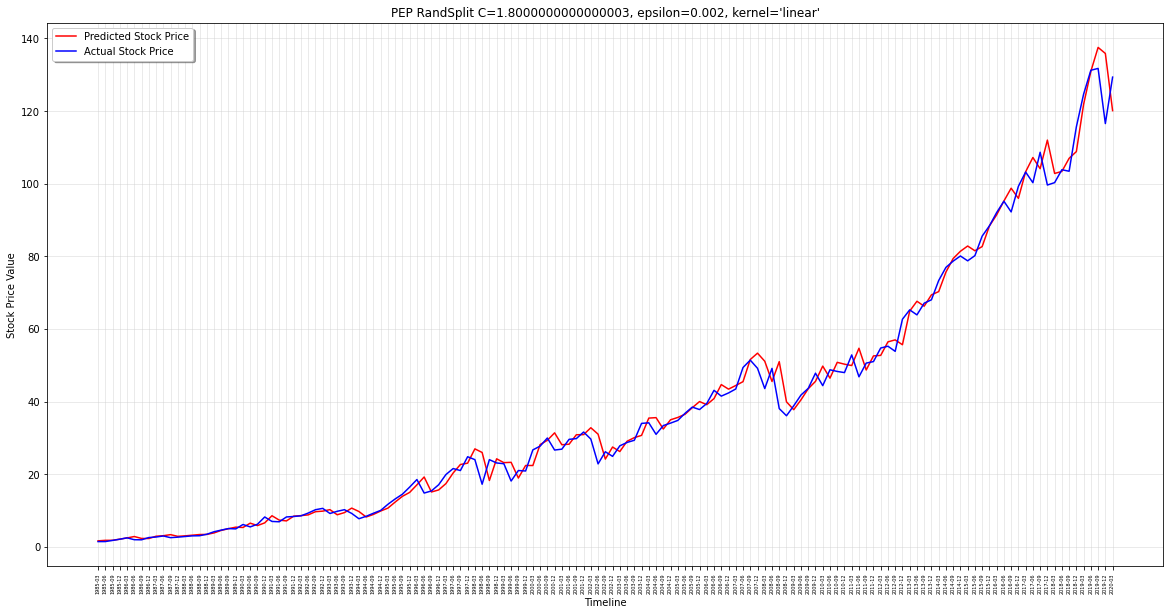

PEP MODEL RESULTS
 RMSE
 	Test: 3.577135118615933
 MAPE
 	Test: 0.07679084118431528
 MAE
 	Test: 2.115448898806062
 R2 Score Adj
 	Test: 0.986099473344516



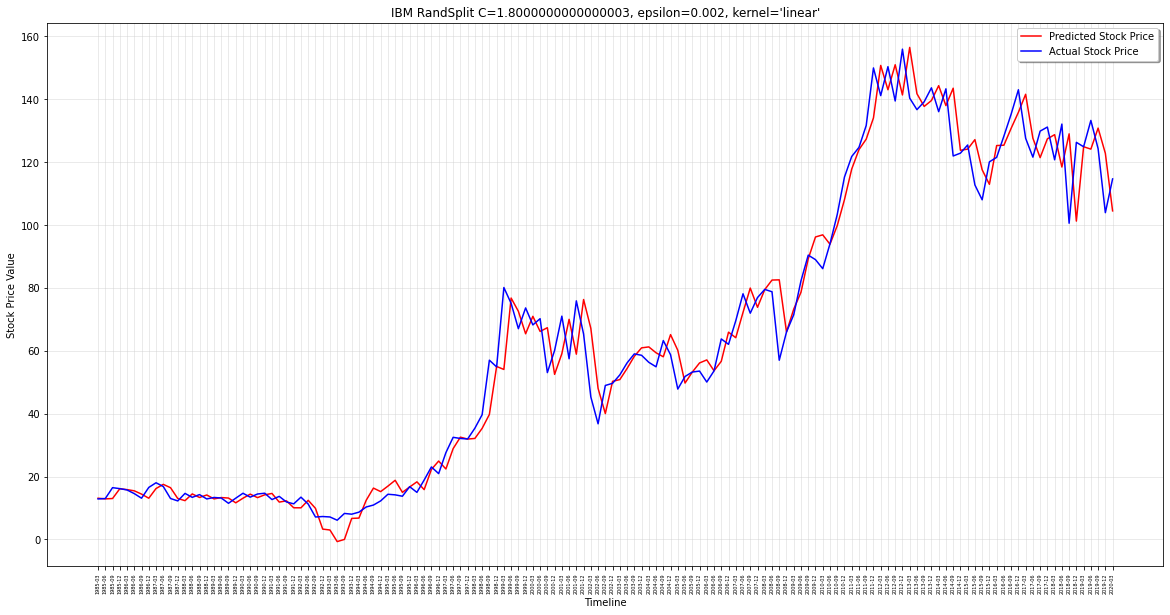

IBM MODEL RESULTS
 RMSE
 	Test: 9.810753002640043
 MAPE
 	Test: 0.15805741734084328
 MAE
 	Test: 6.693020001912258
 R2 Score Adj
 	Test: 0.9629410909152092



In [6]:
from lib.fundamental_lib import model_results_revised
#Results log
#Params={'C': 1, 'epsilon': 0.0005, 'gamma': 9e-05, 'kernel': 'linear'} #best
Params = {'kernel': 'linear', 'C': 1.8000000000000003, 'epsilon': 0.002}
svr = SVR(**Params)
models = list() # 0:PEP, 1:IBM
for stock in ['PEP', 'IBM']:
    models.append(model_results_revised(datas[stock], svr, label=stock, scaling=True, end='2020-06'))

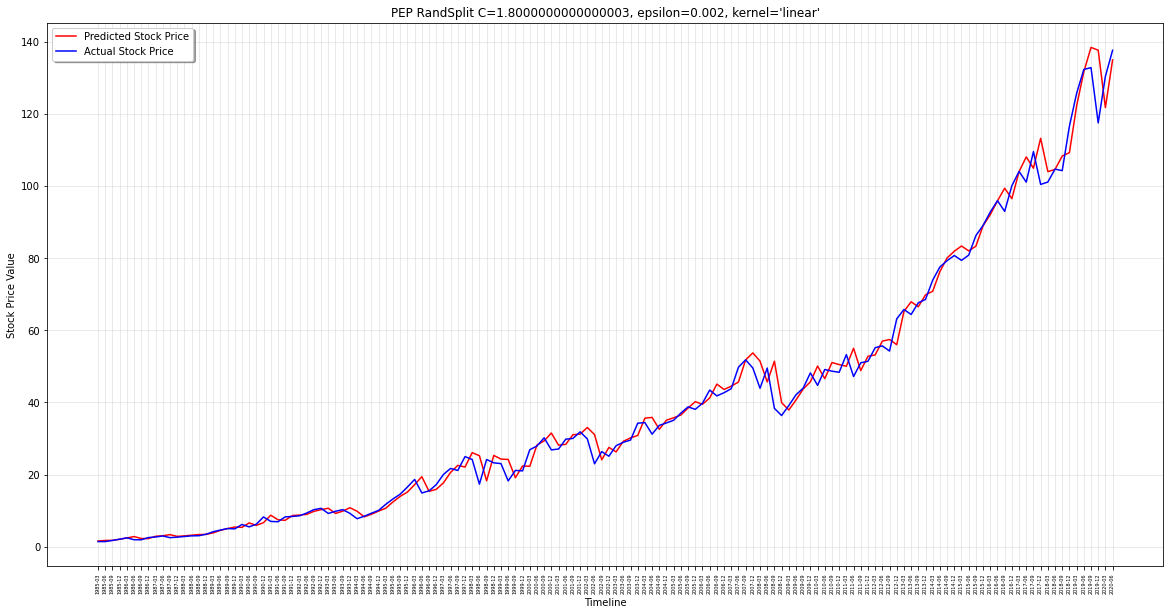

array([  9.86839037,   2.9147588 ,  50.08103718, 103.96822604,
         1.76693674,  67.90439706,  28.16239417,   3.21831856,
        28.39565346,   5.93375897,  52.80518603,  96.49742572,
        19.42942638,  35.76065688,  37.9103837 ,   2.43415639,
         6.69998737,   3.02547366,  15.37081523,  24.30891472,
         9.81890799,  66.53934607,  65.21327896, 122.20874613,
        56.01492199,   1.61655144,   8.79286131,   8.75324246,
        10.82950149])

PEP MODEL RESULTS
 RMSE
 	Test: 2.380229525937752
 MAPE
 	Test: 0.07043381890643419
 MAE
 	Test: 1.5986341601275131
 R2 Score Adj
 	Test: 0.9944232541020418



In [5]:
from lib.fundamental_lib import model_results_revised
#Results log
#Params={'C': 1, 'epsilon': 0.0005, 'gamma': 9e-05, 'kernel': 'linear'} #best
Params = {'kernel': 'linear', 'C': 1.8000000000000003, 'epsilon': 0.002}
svr = SVR(**Params)
test = model_results_revised(datas['PEP'], svr, label='PEP', scaling=True)
test

In [4]:
datos = datas['PEP']['data']['Prediction'].iloc[130:]

In [5]:
datos.values

array([109.52980804, 100.42974091, 101.09339905, 104.67281342,
       104.25828552, 116.58634949, 125.6621933 , 132.29116821,
       132.79995728, 117.48714447, 130.38684082, 137.61959839,
       147.30999756])

In [6]:
from lib.fundamental_lib import backtesting
portfolio = backtesting(datos, 1000)

In [7]:
portfolio

,positions,cash,total
2017-09,0.000000,NaN,NaN
2017-12,0.000000,1000.000000,1000.000000
2018-03,101.093399,898.906601,1000.000000
2018-06,104.672813,898.906601,1003.579414
2018-09,0.000000,1003.164886,1003.164886
2018-12,116.586349,886.578537,1003.164886
2019-03,125.662193,886.578537,1012.240730
2019-06,132.291168,886.578537,1018.869705
2019-09,132.799957,886.578537,1019.378494
2019-12,0.000000,1004.065681,1004.065681


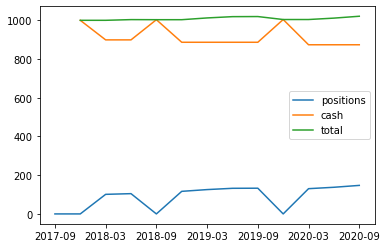

In [8]:
portfolio.plot()
plt.show()

[SVR(C=1.8000000000000003, epsilon=0.002, kernel='linear'),
 SVR(C=1.8000000000000003, epsilon=0.002, kernel='linear')]

In [60]:
datas_pred

{'NSC': {'XY': 0, 'X': 0, 'scl': 0, 'index': 0},
 'GL': {'XY': 0, 'X': 0, 'scl': 0, 'index': 0},
 'PEP': {'X': (array([[  6.362     , 136.52941895,  50.98479363],
          [  6.373     , 147.12522888,  51.27835794],
          [  6.416     , 141.44999695,  51.8395574 ]]),
   array([147.12522888, 141.44999695, 141.44999695]),
   array([[  6.373     , 147.12522888,  51.27835794],
          [  6.362     , 136.52941895,  50.98479363]]),
   array([[  6.416     , 141.44999695,  51.8395574 ]]),
   array([141.44999695, 147.12522888]),
   array([141.44999695])),
  'XY': (array([[  6.362     , 136.52941895,  50.98479363],
          [  6.373     , 147.12522888,  51.27835794],
          [  6.416     , 141.44999695,  51.8395574 ]]),
   array([[ 1.41421356],
          [-0.70710678],
          [-0.70710678]]),
   array([[  6.373     , 147.12522888,  51.27835794],
          [  6.362     , 136.52941895,  50.98479363]]),
   array([[  6.416     , 141.44999695,  51.8395574 ]]),
   array([-0.70710678,  1.4

In [4]:
X_scaled, y_scaled, _, _, _, _ = datas_pred['PEP']['XY']

In [64]:
datas_pred['IBM']['scl'].inverse_transform(models[1].predict(X_scaled))

array([133.56196337, 134.08068768, 134.81269055])

In [65]:
datas_pred['IBM']['data'].index

Index(['2020-09', '2020-12', '2021-03'], dtype='object')

In [10]:
def backtesting(prices_df, init_capital, verbose=False):
    data_signal = pd.DataFrame(index=prices_df.index)
    data_signal['price'] = prices_df.Price
    data_signal['daily_difference'] = prices_df.Predict - data_signal['price'] 
    data_signal['signal'] = 0.0
    data_signal['signal'][:] = np.where(data_signal['daily_difference'][:] > 0, 1.0, 0.0)   # If prediction for the next day is greater than the actual price buy (signal 1)
                                                                                            # Else, sell (signal 0)
        
    data_signal['positions'] = data_signal['signal'].diff()                                 # By making the difference of the signals the algorithm will not overbuy or oversell the same stock
 
    positions = pd.DataFrame(index=data_signal.index).fillna(0.0)
    portfolio = pd.DataFrame(index=data_signal.index).fillna(0.0)
    #data_signal['positions']=data_signal['positions'].abs()
    positions['stock'] = data_signal['signal']

    portfolio['positions'] = (positions.multiply(data_signal['price'], axis=0))             # Multiply the signal (1 or 0) to indicate with money if they have a position or not
    pos_diff = positions.diff()
    pos_diff['stock'][0] = 1.0 if data_signal['signal'][0] == 1.0 else 0.0                  # Indicates to the algorithm that the first signal is approved
    portfolio['cash'] = init_capital - (pos_diff.multiply(data_signal['price'], axis=0)).cumsum()
    portfolio['total'] = portfolio['positions'] + portfolio['cash']
    
    if verbose:
        print(data_signal,'\n')
        print(positions,'\n')
        print(portfolio,'\n')
    
    return portfolio

In [7]:
pred = datas_pred['PEP']['scl'].inverse_transform(models[1].predict(X_scaled))
#pred[0] = 125.555

In [8]:
df = pd.DataFrame(index=datas_pred['PEP']['data'].index)
df['Price'] = datas_pred['PEP']['data']['PricePerShare']
df['Predict'] = pred
df

,Price,Predict
2020-09,136.529419,147.180587
2020-12,147.125229,147.729236
2021-03,141.449997,147.440791


In [11]:
porto = backtesting(df, 150, verbose=True)

              price  daily_difference  signal  positions
2020-09  136.529419         10.651168     1.0        NaN
2020-12  147.125229          0.604007     1.0        0.0
2021-03  141.449997          5.990794     1.0        0.0 

         stock
2020-09    1.0
2020-12    1.0
2021-03    1.0 

          positions       cash       total
2020-09  136.529419  13.470581  150.000000
2020-12  147.125229  13.470581  160.595810
2021-03  141.449997  13.470581  154.920578 



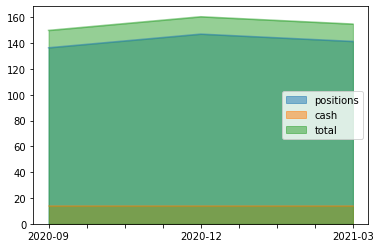

In [12]:
porto.plot.area(stacked=False)
plt.show()

In [13]:
porto

,positions,cash,total
2020-09,136.529419,13.470581,150.000000
2020-12,147.125229,13.470581,160.595810
2021-03,141.449997,13.470581,154.920578
